In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Desktop/Pizza.csv')

In [8]:
df

,Restaurant,Extra Cheese,Extra Mushroom,Size,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


In [10]:
df.shape

(20, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheese    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3    Size           20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [14]:
df['Extra Cheese'] = df['Extra Cheese'].map({'yes': 1, 'no': 0})
df['Extra Mushroom'] = df['Extra Mushroom'].map({'yes': 1, 'no': 0})
df['Extra Spicy'] = df['Extra Spicy'].map({'yes': 1, 'no': 0})

In [16]:
df.head()

,Restaurant,Extra Cheese,Extra Mushroom,Size,Extra Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df.rename(columns={' Size': 'Size'}, inplace=True)

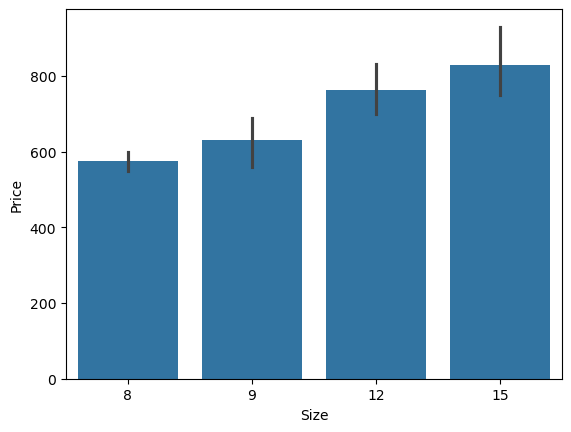

In [34]:
sns.barplot(data = df, x = df["Size"], y = df["Price"])
plt.show()

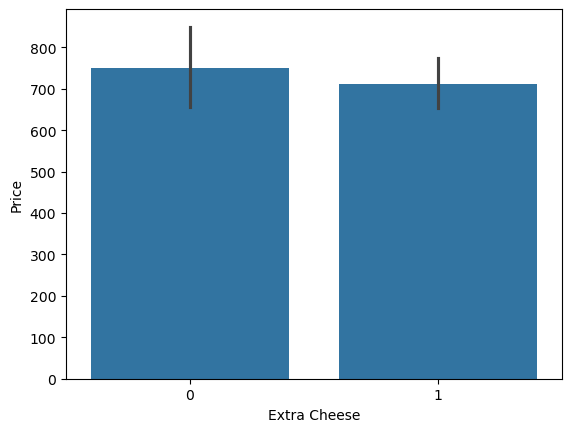

In [36]:
sns.barplot(data = df, x = df["Extra Cheese"], y = df["Price"])
plt.show()

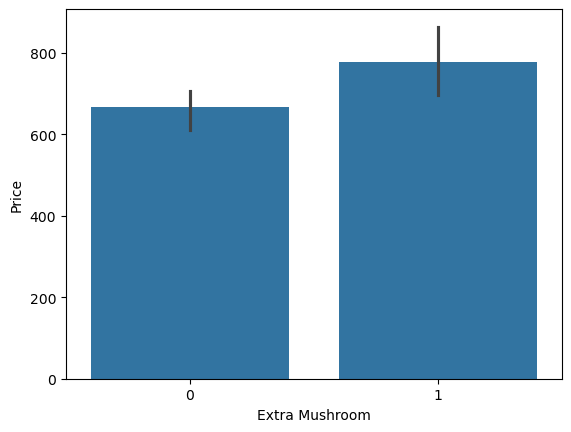

In [38]:
sns.barplot(data = df, x = df["Extra Mushroom"], y = df["Price"])
plt.show()

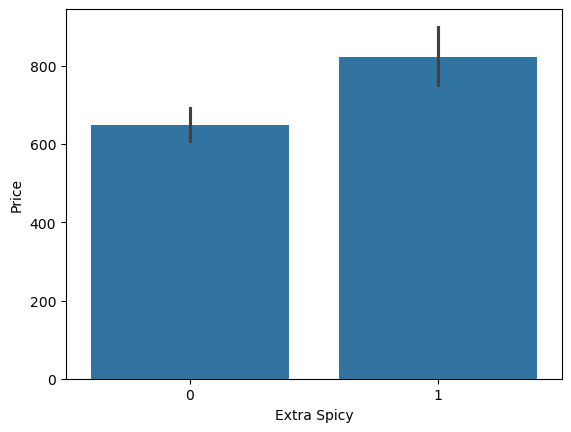

In [40]:
sns.barplot(data = df, x = df["Extra Spicy"], y = df["Price"])
plt.show()

In [44]:
df = df.drop(columns="Restaurant")

In [46]:
df

,Extra Cheese,Extra Mushroom,Size,Extra Spicy,Price
0,1,1,12,0,650
1,0,1,15,1,800
2,0,0,9,0,500
3,1,0,12,1,700
4,1,0,12,1,750
5,0,1,15,1,900
6,1,0,9,0,600
7,1,0,9,1,700
8,0,1,15,0,750
9,0,1,15,0,700


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features and target variable
X = df[['Extra Cheese', 'Extra Mushroom', 'Size', 'Extra Spicy']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model.coef_, model.intercept_, mse, r2

(array([ 90.38012056,  74.46410998,  31.53678189, 122.69498093]),
 208.48120925083072,
 17610.956916416006,
 0.0)

In [56]:
# Create new synthetic dataset for predictions
new_data = {
    "Extra Cheese": np.random.choice([0, 1], size=20),
    "Extra Mushroom": np.random.choice([0, 1], size=20),
    "Size": np.random.randint(10, 18, size=20),
    "Extra Spicy": np.random.choice([0, 1], size=20)
}

new_df = pd.DataFrame(new_data)

# Make predictions using the trained model
new_predictions = model.predict(new_df)

new_df['Predicted Price'] = new_predictions
new_df

,Extra Cheese,Extra Mushroom,Size,Extra Spicy,Predicted Price
0,1,1,14,0,814.840386
1,0,0,16,0,713.069720
2,1,0,14,0,740.376276
3,0,1,15,1,878.692029
4,0,1,15,0,755.997048
5,1,1,11,0,720.230041
6,1,1,14,0,814.840386
7,1,1,11,1,842.925022
8,1,1,17,0,909.450732
9,0,1,17,0,819.070611


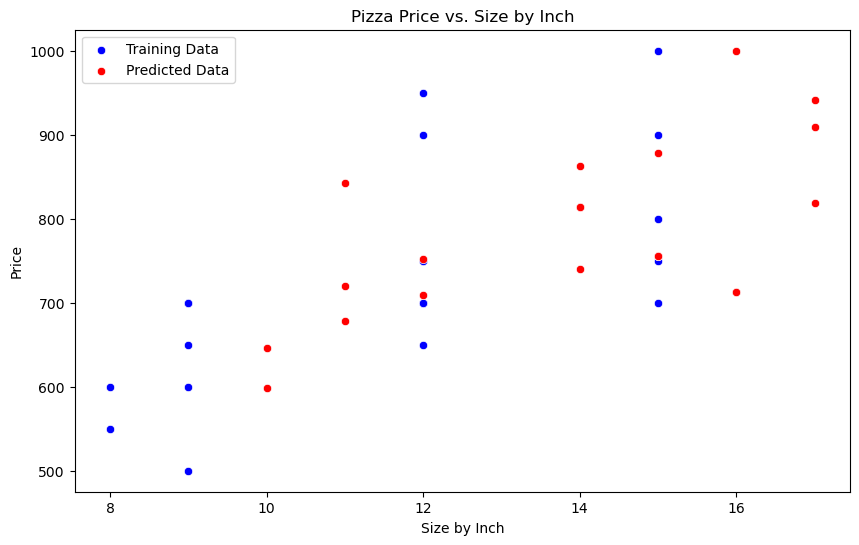

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between Size by Inch and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Price', data=df, color='blue', label='Training Data')
sns.scatterplot(x='Size', y='Predicted Price', data=new_df, color='red', label='Predicted Data')
plt.title('Pizza Price vs. Size by Inch')
plt.xlabel('Size by Inch')
plt.ylabel('Price')
plt.legend()
plt.show()